<a href="https://colab.research.google.com/github/dschirmerii/fintechbootcamp-Project_2/blob/main/LSTM_appl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yahoo-finance

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader as web
import yahoo_finance as yf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, LSTM
import os

In [3]:
company='AAPL'

In [24]:
start= dt.datetime(2016,1,1)

In [26]:
end= dt.datetime(2021,1,1)

In [27]:
data=web.DataReader("AAPL", "av-daily", start=start,
               end=end,
               api_key=os.getenv('ALPHAVANTAGE_API_KEY'))

In [28]:
data.head()

,open,high,low,close,volume
2016-01-04,102.61,105.368,102.00,105.35,67649387
2016-01-05,105.75,105.850,102.41,102.71,55790992
2016-01-06,100.56,102.370,99.87,100.70,68457388
2016-01-07,98.68,100.130,96.43,96.45,81094428
2016-01-08,98.55,99.110,96.76,96.96,70798016


In [29]:
# Prepare the data

In [30]:
scaler = MinMaxScaler(feature_range=(0,1))

In [31]:
scaled_data=scaler.fit_transform(data['close'].values.reshape(-1,1))

In [32]:
prediction_days=60

In [33]:
x_train=[]

In [34]:
y_train=[]

In [35]:
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x,0])

x_train, y_train= np.array(x_train), np.array(y_train)
x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [36]:
#build the model

In [37]:
model = Sequential()

In [38]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # prediction of the next closing
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
model.fit(x_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
38/38 [==============================] - 8s 85ms/step - loss: 0.0172
Epoch 2/25
38/38 [==============================] - 3s 85ms/step - loss: 0.0072
Epoch 3/25
38/38 [==============================] - 3s 84ms/step - loss: 0.0057
Epoch 4/25
38/38 [==============================] - 3s 85ms/step - loss: 0.0051
Epoch 5/25
38/38 [==============================] - 3s 84ms/step - loss: 0.0052
Epoch 6/25
38/38 [==============================] - 3s 84ms/step - loss: 0.0055
Epoch 7/25
38/38 [==============================] - 3s 85ms/step - loss: 0.0035
Epoch 8/25
38/38 [==============================] - 3s 85ms/step - loss: 0.0034
Epoch 9/25
38/38 [==============================] - 3s 84ms/step - loss: 0.0039
Epoch 10/25
38/38 [==============================] - 3s 85ms/step - loss: 0.0032
Epoch 11/25
38/38 [==============================] - 3s 85ms/step - loss: 0.0036
Epoch 12/25
38/38 [==============================] - 3s 85ms/step - loss: 0.0030
Epoch 13/25
38/38 [==================

In [40]:
#Testing the Model

In [43]:
test_start=dt.datetime(2021,1,1)

In [44]:
test_end=dt.datetime.now()

In [45]:
test_data=web.DataReader(company, "av-daily", start=start,
               end=end,
               api_key=os.getenv('ALPHAVANTAGE_API_KEY'))

In [46]:
actual_prices=test_data['close'].values

In [47]:
total_dataset=pd.concat((data['close'],test_data['close']),axis=0)


In [48]:
model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values

In [49]:
model_inputs=model_inputs.reshape(-1,1)

In [50]:
model_inputs=scaler.transform(model_inputs)

In [51]:
# Make Predictions on Test Data

In [52]:
x_test=[]


In [53]:
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

In [54]:
x_test=np.array(x_test)

In [55]:
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [56]:
predicted_prices=model.predict(x_test)

In [57]:
predicted_prices=scaler.inverse_transform(predicted_prices)

In [58]:
# Plot

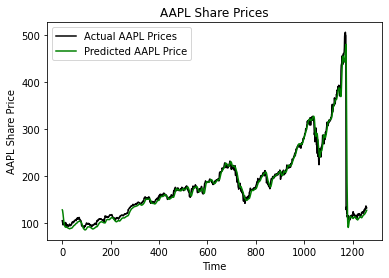

In [59]:
plt.plot(actual_prices, color='black',label=f'Actual {company} Prices')
plt.plot(predicted_prices,color='green',label=f'Predicted {company} Price')
plt.title(f'{company} Share Prices')
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

In [60]:
# Predicting next Day

In [65]:
real_data=[model_inputs[len(model_inputs)+ 1- prediction_days:len(model_inputs),0]]

In [66]:
real_data=np.array(real_data)

In [67]:
real_data=np.reshape(real_data, (real_data.shape[0],real_data.shape[1],1))

In [68]:
prediction=model.predict(real_data)

In [69]:
prediction=scaler.inverse_transform(prediction)

In [70]:
# Next day prediction

In [71]:
print(f'Prediction:{prediction}')

Prediction:[[128.24287]]
